In [1]:
import numpy as np
import pandas as pd

In [2]:
geo_assignment = pd.read_csv("Geo_assignment.csv")

In [5]:
# result = pyreadr.read_r("salesandcost.rda")
# salesandcost = result['salesandcost']

In [3]:
salesandcost= pd.read_csv("salesandcost.csv")

In [4]:
salesandcost.head()

,Unnamed: 0,date,geo,sales,cost
0,0,2015-01-05,1,7227.32,0.0
1,1,2015-01-05,10,1827.21,0.0
2,2,2015-01-05,100,23.98,0.0
3,3,2015-01-05,11,1501.10,0.0
4,4,2015-01-05,12,1371.61,0.0


In [5]:
salesandcost['date'] = pd.to_datetime(salesandcost['date']) 
salesandcost['week'] = salesandcost['date'].dt.isocalendar().week 

In [6]:
salesandcost.head()

,Unnamed: 0,date,geo,sales,cost,week
0,0,2015-01-05,1,7227.32,0.0,2
1,1,2015-01-05,10,1827.21,0.0,2
2,2,2015-01-05,100,23.98,0.0,2
3,3,2015-01-05,11,1501.10,0.0,2
4,4,2015-01-05,12,1371.61,0.0,2


In [7]:
salesandcost= salesandcost[['week','cost','sales']].groupby(['week']).agg(['sum']).reset_index()

In [8]:
salesandcost

,week,cost,sales
,,sum,sum
0,2,0.00,348104.16
1,3,0.00,309470.34
2,4,0.00,338153.10
3,5,0.00,285590.37
4,6,0.00,346531.24
5,7,0.00,369843.24
6,8,11155.30,412418.37
7,9,12468.26,465114.16
8,10,13205.26,484845.60


In [80]:
salesandcost= pd.read_csv("salesandcost.csv")

In [81]:
salesandcost['date'] = pd.to_datetime(salesandcost['date']) 
salesandcost

,Unnamed: 0,date,geo,sales,cost
0,0,2015-01-05,1,7227.32,0.0
1,1,2015-01-05,10,1827.21,0.0
2,2,2015-01-05,100,23.98,0.0
3,3,2015-01-05,11,1501.10,0.0
4,4,2015-01-05,12,1371.61,0.0
...,...,...,...,...,...
9220,9220,2015-04-07,95,49.01,0.0
9221,9221,2015-04-07,96,49.01,0.0
9222,9222,2015-04-07,97,35.01,0.0
9223,9223,2015-04-07,98,49.01,0.0


In [82]:
import pandas as pd
salesandcost['date'] = pd.to_datetime(salesandcost['date']) 

In [83]:
salesandcost = salesandcost.merge(geo_assignment, on= 'geo')

In [84]:
salesandcost.columns

Index(['Unnamed: 0_x', 'date', 'geo', 'sales', 'cost', 'Unnamed: 0_y',
       'geo.group'],
      dtype='object')

In [85]:
salesandcost

,Unnamed: 0_x,date,geo,sales,cost,Unnamed: 0_y,geo.group
0,0,2015-01-05,1,7227.32,0.0,0,2
1,1,2015-01-05,10,1827.21,0.0,9,1
2,2,2015-01-05,100,23.98,0.0,99,1
3,3,2015-01-05,11,1501.10,0.0,10,1
4,4,2015-01-05,12,1371.61,0.0,11,2
...,...,...,...,...,...,...,...
9220,9220,2015-04-07,95,49.01,0.0,94,1
9221,9221,2015-04-07,96,49.01,0.0,95,2
9222,9222,2015-04-07,97,35.01,0.0,96,1
9223,9223,2015-04-07,98,49.01,0.0,97,2


In [86]:
salesandcost.isnull().values.ravel().sum()

np.int64(0)

In [87]:
salesandcost_control = salesandcost[salesandcost['geo.group']==1]
salesandcost_treatment = salesandcost[salesandcost['geo.group']==2]

In [88]:
salesandcost_control

,Unnamed: 0_x,date,geo,sales,cost,Unnamed: 0_y,geo.group
1,1,2015-01-05,10,1827.21,0.0,9,1
2,2,2015-01-05,100,23.98,0.0,99,1
3,3,2015-01-05,11,1501.10,0.0,10,1
5,5,2015-01-05,13,1366.81,0.0,12,1
8,8,2015-01-05,16,1016.72,0.0,15,1
...,...,...,...,...,...,...,...
9213,9213,2015-04-07,89,168.05,0.0,88,1
9216,9216,2015-04-07,91,84.02,0.0,90,1
9219,9219,2015-04-07,94,49.01,0.0,93,1
9220,9220,2015-04-07,95,49.01,0.0,94,1


In [66]:
# geos= salesandcost_control.groupby('date')['geo'].nunique().reset_index()['geo']

In [89]:
salesandcost_control = salesandcost_control.groupby('date').sum('sales').reset_index()
salesandcost_control

,date,Unnamed: 0_x,geo,sales,cost,Unnamed: 0_y,geo.group
0,2015-01-05,2288,2432,29686.21,0.0,2382,49
1,2015-01-06,7335,2529,32205.96,0.0,2478,50
2,2015-01-07,12335,2529,31537.90,0.0,2478,50
3,2015-01-08,17335,2529,29182.26,0.0,2478,50
4,2015-01-09,22335,2529,26875.22,0.0,2478,50
...,...,...,...,...,...,...,...
88,2015-04-03,438635,2529,53293.61,0.0,2478,50
89,2015-04-04,443635,2529,25308.14,0.0,2478,50
90,2015-04-05,448635,2529,25430.66,0.0,2478,50
91,2015-04-06,453635,2529,55083.76,0.0,2478,50


In [90]:
salesandcost_control['sales']= salesandcost_control['sales']/50
salesandcost_control

,date,Unnamed: 0_x,geo,sales,cost,Unnamed: 0_y,geo.group
0,2015-01-05,2288,2432,593.7242,0.0,2382,49
1,2015-01-06,7335,2529,644.1192,0.0,2478,50
2,2015-01-07,12335,2529,630.7580,0.0,2478,50
3,2015-01-08,17335,2529,583.6452,0.0,2478,50
4,2015-01-09,22335,2529,537.5044,0.0,2478,50
...,...,...,...,...,...,...,...
88,2015-04-03,438635,2529,1065.8722,0.0,2478,50
89,2015-04-04,443635,2529,506.1628,0.0,2478,50
90,2015-04-05,448635,2529,508.6132,0.0,2478,50
91,2015-04-06,453635,2529,1101.6752,0.0,2478,50


In [92]:
# geos= salesandcost_treatment.groupby('date')['geo'].nunique().reset_index()['geo']
# geos

In [93]:
salesandcost_treatment = salesandcost_treatment.groupby('date').sum('sales').reset_index()
# salesandcost_treatment['geo_count']= geos
salesandcost_treatment['sales']=salesandcost_treatment['sales']/50
salesandcost_treatment

,date,Unnamed: 0_x,geo,sales,cost,Unnamed: 0_y,geo.group
0,2015-01-05,2563,2521,602.8356,0.0,2472,100
1,2015-01-06,7515,2521,633.4206,0.0,2472,100
2,2015-01-07,12515,2521,630.0794,0.0,2472,100
3,2015-01-08,17515,2521,588.5136,0.0,2472,100
4,2015-01-09,22515,2521,539.3632,0.0,2472,100
...,...,...,...,...,...,...,...
88,2015-04-03,438815,2521,1018.0802,0.0,2472,100
89,2015-04-04,443815,2521,465.0010,0.0,2472,100
90,2015-04-05,448815,2521,509.0292,0.0,2472,100
91,2015-04-06,453815,2521,1105.4442,0.0,2472,100


<Axes: xlabel='date'>

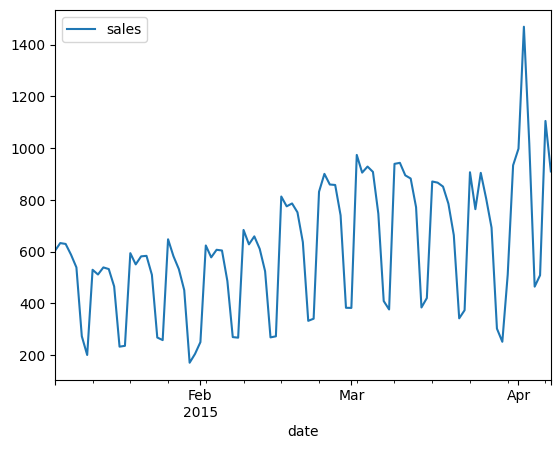

In [118]:
import matplotlib
from matplotlib import pyplot as plt
salesandcost_treatment[['date','sales']].plot(x='date',y='sales')

In [94]:
train_df=pd.DataFrame()
train_df['y']= salesandcost_treatment[salesandcost_treatment['date']<='2015-02-15']['sales']
train_df['x']= salesandcost_control[salesandcost_control['date']<='2015-02-15']['sales']
train_df
test_df=pd.DataFrame()
test_df['y']= salesandcost_treatment[(salesandcost_treatment['date']>='2015-02-16') & (salesandcost_treatment['date']<='2015-03-15')]['sales']
test_df['x']= salesandcost_control[(salesandcost_control['date']>='2015-02-16')& (salesandcost_control['date']<='2015-03-15')]['sales']

In [95]:
train_df

,y,x
0,602.8356,593.7242
1,633.4206,644.1192
2,630.0794,630.7580
3,588.5136,583.6452
4,539.3632,537.5044
5,273.4130,282.1638
6,200.7500,221.7930
7,530.2212,558.8114
8,511.9328,533.4800
9,539.3518,562.0064


In [96]:
test_df

,y,x
42,813.3902,710.8616
43,775.4994,643.4092
44,786.5434,674.1426
45,752.3664,628.1432
46,636.9880,553.1968
47,332.8534,306.9230
48,341.1086,292.9416
49,831.6572,746.2310
50,900.9152,787.8354
51,859.7850,736.9376


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(train_df['x'].values.reshape(-1,1))

In [98]:
import numpy as np
import statsmodels.api as sm
# X = train_df['x'].values.reshape(-1,1)
X = sm.add_constant(X)
y = train_df['y'].values
model = sm.OLS(y, X).fit()

model

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7487.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.06e-47
Time:                        21:03:54   Log-Likelihood:                -162.84
No. Observations:                  42   AIC:                             329.7
Df Residuals:                      40   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.3518      1.847    255.151      0.000     467.618     475.085
x1           159.8416      1.847     86.525      0.000     156.108     163.575
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.336
Skew:                          -0.067   Prob(JB):                        0.513
Kurtosis:                       2.137   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#Extracting Prediction Results:
#y.hat: Point estimates of the predicted mean responses.
y_hat = model.predict(X)

#y.hat.sd: Standard deviation estimates of the mean predictions.
predictions = model.get_prediction(X)
predictions_summary = predictions.summary_frame(alpha=0.05)  # 95% CI by default
y_hat_sd = predictions_summary['mean_se']

#sigma: The estimated standard deviation of the residuals (errors) of the linear model.
sigma = np.sqrt(model.scale)

y_pred_sd = (y_hat_sd**2 + sigma**2)**0.5  # Pointwise s.d. of the predictions.
y_pred_sd

0     12.184991
1     12.261488
2     12.238555
3     12.172977
4     12.132103
5     12.327470
6     12.475602
7     12.148088
8     12.129642
9     12.150913
10    12.137489
11    12.115403
12    12.420874
13    12.441217
14    12.178854
15    12.157754
16    12.195211
17    12.206497
18    12.119961
19    12.336912
20    12.393295
21    12.269300
22    12.186381
23    12.127206
24    12.119556
25    12.600835
26    12.490822
27    12.391422
28    12.266473
29    12.185937
30    12.231513
31    12.177294
32    12.113854
33    12.315464
34    12.358879
35    12.345900
36    12.246694
37    12.298455
38    12.259819
39    12.127097
40    12.306663
41    12.294940
Name: mean_se, dtype: float64

In [103]:
y_pred_dif = (y - y_hat)*50
y_pred_dif_cum_sum = np.cumsum(y_pred_dif)/50
y_pred_dif_cum_sum

array([ 1.77240340e+01,  1.56531804e+01,  2.35983201e+01,  3.70763316e+01,
        4.75309065e+01,  4.72993098e+01,  3.47574092e+01,  1.47693736e+01,
        1.81674155e+00, -1.22347360e+01, -1.61245757e+01, -4.81869648e+00,
       -5.66502209e+00,  4.47469962e+00,  1.88316243e+01,  9.18432620e+00,
       -1.77806319e+00, -1.89699940e+01, -1.27864981e+01, -1.37210031e+01,
       -2.51815763e-01,  8.05882460e+00,  4.53339134e+00,  1.66558682e+01,
        2.88779286e+01,  2.86255944e+01,  2.57450577e+01,  3.06620755e+01,
        1.65464514e+01,  8.90491204e+00, -1.44425024e+00,  2.45594796e+01,
        3.93683738e+01,  3.00110820e+01,  3.83008339e+01,  4.50259784e+01,
        4.65197786e+01,  5.08349869e+01,  2.71602524e+01,  3.11692687e+01,
        1.64422583e+01,  4.93855623e-12])

In [104]:
import numpy as np 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
# Standardize the predictor 'x' (train_df is assumed to be the dataset) 
scaler = StandardScaler() 
# X = train_df['x'].values.reshape(-1,1) 
X =scaler.fit_transform(train_df['x'].values.reshape(-1, 1)) 
X = sm.add_constant(X) # Add the intercept to the model

# X_test = test_df['x'].values.reshape(-1,1) 
X_test=scaler.transform(test_df['x'].values.reshape(-1, 1)) # Test data (use same scaler)
X_test = sm.add_constant(X_test) # Add intercept to the test data as well 

y_train = train_df['y'].values # Response variable 
y_test = test_df['y'].values # Response variable for test data
# Fit the linear regression model 
model = sm.OLS(y_train, X).fit()
# Prediction results (mean and standard deviations) 
y_hat = model.predict(X_test) 
predictions = model.get_prediction(X_test)
print(predictions)

In [105]:
# Get the covariance matrix of the model 
covariance_matrix = model.cov_params() 
alpha_var = covariance_matrix[0, 0] # Variance of the intercept
covariance_matrix

array([[ 3.41268415e+00, -1.89179256e-16],
       [-1.89179256e-16,  3.41268415e+00]])

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7487.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.06e-47
Time:                        21:08:21   Log-Likelihood:                -162.84
No. Observations:                  42   AIC:                             329.7
Df Residuals:                      40   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.3518      1.847    255.151      0.000     467.618     475.085
x1           159.8416      1.847     86.525      0.000     156.108     163.575
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.336
Skew:                          -0.067   Prob(JB):                        0.513
Kurtosis:                       2.137   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Cumulative variance calculation for the test period 
x_test_values = scaler.transform(test_df['x'].values.reshape(-1, 1)) # The 'x' values from the test data
x_seq = np.arange(1, len(x_test_values) + 1) # Sequence for the test period
# Calculate cumulative mean for the test data 
# x_cum_mean = np.cumsum(x_test_values*50)/50 

x_cum_mean = (np.cumsum(x_test_values*50)/50) / x_seq
print("x_cum_mean", x_cum_mean)

x_cum_mean [1.4443173  1.23338298 1.22714367 1.15210032 1.01332661 0.66409843
 0.40215772 0.56007909 0.71181873 0.80137734 0.87659641 0.89660681
 0.75749513 0.64141194 0.73819373 0.80639103 0.87217833 0.92433622
 0.92482088 0.83907692 0.75119979 0.8189593  0.87604713 0.92213359
 0.95692388 0.96656773 0.89786884 0.83585747]


In [113]:
x_test_values*50

array([[ 72.21586489],
       [ 51.12243274],
       [ 60.73325293],
       [ 46.34851314],
       [ 22.91158869],
       [-54.10212304],
       [-58.47432791],
       [ 83.27643558],
       [ 96.28678938],
       [ 80.37024244],
       [ 81.43935526],
       [ 55.83606075],
       [-45.59225015],
       [-43.38347581],
       [104.65694084],
       [ 91.46752597],
       [ 96.23875623],
       [ 90.55101847],
       [ 46.67724   ],
       [-39.50292274],
       [-50.31713592],
       [112.09544936],
       [106.59896859],
       [ 99.10611006],
       [ 89.59454588],
       [ 60.38319885],
       [-44.41512528],
       [-41.92246753]])

In [119]:
# Compute cumulative variance of the predictions 
y_pred_var_cum_test=0
if covariance_matrix.shape[0] == 1:# Only intercept in the model 
    # y_pred_var_cum_test = alpha_var 
    y_pred_var_cum_test = (x_seq ** 2) * alpha_var 
else: # Intercept and slope case 
    beta_var = covariance_matrix[1, 1]   
    # Variance of the slope 
    alpha_beta_cov = covariance_matrix[0, 1] # Covariance between intercept and slope
    # Compute cumulative variance of predictions accounting for correlation 
    y_pred_var_cum_test = (x_seq ** 2) * ( alpha_var + (x_cum_mean ** 2) * beta_var + 2 * x_cum_mean * alpha_beta_cov )
# Output the cumulative variance for the test period 
print("Cumulative sd of predictions during the test period:", y_pred_var_cum_test**0.5)
# Compute cumulative sum of prediction errors (optional) 
y_pred_dif_test = (y_test - y_hat)*50 
y_pred_dif_cum_sum = np.cumsum(y_pred_dif_test)/50 
print("Cumulative sum of prediction differences:", y_pred_dif_cum_sum)

Cumulative sd of predictions during the test period: [ 3.24526152  5.86657441  8.77302921 11.27294798 13.15003176 13.30562612
 13.93794817 16.93886274 20.40806923 23.67346437 27.02300222 29.77391723
 30.12770256 30.7257553  34.44242397 37.97039123 41.67149101 45.28162085
 47.80881508 48.23021742 48.52075184 52.53143068 56.48725955 60.3092499
 63.92226902 66.80024512 67.03335212 67.41538469]
Cumulative sum of prediction differences: [ 111.17636113  251.89409465  372.9316445   505.77780006  598.16948072
  632.62650886  689.31594426  783.40051196  905.15115597 1036.65413676
 1162.94974279 1253.80419646 1311.43778517 1361.58909198 1529.76876257
 1671.78138514 1821.93218309 1969.67612677 2096.23339756 2160.49542565
 2226.81568341 2336.73928718 2468.16462009 2575.17436769 2700.38159416
 2808.12060832 2863.20452583 2946.74243369]


In [109]:
np.sum(y_test*50) - np.sum(y_hat*50)

np.float64(147337.1216845105)

In [110]:
predictions_summary = predictions.summary_frame(alpha=0.05)  # 95% CI by default
y_hat_sd = predictions_summary['mean_se']
#sigma: The estimated standard deviation of the residuals (errors) of the linear model.
sigma = np.sqrt(model.scale)

y_pred_sd = (y_hat_sd**2 + sigma**2)**0.5  # Pointwise s.d. of the predictions.
y_pred_sd

0     12.404211
1     12.260222
2     12.319924
3     12.234290
4     12.143393
5     12.277664
6     12.304997
7     12.498486
8     12.625419
9     12.472487
10    12.481951
11    12.288257
12    12.230410
13    12.219438
14    12.716020
15    12.576408
16    12.624919
17    12.567351
18    12.235996
19    12.201459
20    12.255673
21    12.802269
22    12.738022
23    12.655165
24    12.557990
25    12.317575
26    12.224496
27    12.212474
Name: mean_se, dtype: float64

In [158]:
y_pred_sd_cum = (y_pred_var_cum_test+sigma**2)**0.5
y_pred_sd_cum

array([ 620.21056242,  666.61351195,  742.12326438,  822.21057305,
        889.17949486,  894.94751375,  918.6935475 , 1037.13283285,
       1183.0279205 , 1326.42908749, 1477.81543434, 1604.53956155,
       1620.96514141, 1648.79105206, 1823.19314889, 1990.65525911,
       2167.85948448, 2341.87847722, 2464.25218563, 2484.69646371,
       2498.79775778, 2693.92090818, 2887.10201816, 3074.30413197,
       3251.68771985, 3393.2305708 , 3404.70374281, 3423.50946683])

In [102]:
y_pred_dif_test

array([5558.81805653, 7035.88667622, 6051.87749237, 6642.30777804,
       4619.58403281, 1722.85140704, 2834.47177013, 4704.2283848 ,
       6087.53220056, 6575.14903969, 6314.78030113, 4542.72268356,
       2881.67943537, 2507.56534088, 8408.98352958, 7100.63112825,
       7507.53989749, 7387.19718388, 6327.86353972, 3213.10140425,
       3316.01288824, 5496.18018851, 6571.26664523, 5350.48738034,
       6260.36132328, 5386.95070811, 2754.19587573, 4176.89539278])

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7487.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           4.06e-47
Time:                        14:49:05   Log-Likelihood:                -327.14
No. Observations:                  42   AIC:                             658.3
Df Residuals:                      40   BIC:                             661.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.357e+04     92.367    255.151      0.000    2.34e+04    2.38e+04
x1          7992.0816     92.367     86.525      0.000    7805.400    8178.763
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.336
Skew:                          -0.067   Prob(JB):                        0.513
Kurtosis:                       2.137   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
np.sqrt(y_pred_var_cum_test)

array([ 3283016.84745424,  6254514.03282297,  9367949.21272947,
       12268942.46998083, 14823806.05355108, 16241287.8546216 ,
       17594198.47669389, 21040564.04898184, 24679073.83896928,
       28082519.11750224, 31501753.65515067, 34542864.34827314,
       36086024.73541979, 37661805.5434856 , 41423930.43501304,
       44991266.63430204, 48629067.04380041, 52182867.74511125,
       55088715.82545468, 56721806.82242423, 58195187.44077037,
       62067168.40708613, 65857974.25597463, 69538121.3586397 ,
       73077796.3351743 , 76186061.71963862, 77746606.54839694,
       79343964.34789833])